# Loading and Visualizing Microscopy Data

This notebook demonstrates the basic usage of `arcadia-microscopy-tools` for loading and visualizing microscopy images from ND2 files.

This page is rendered from a jupyter notebook (`docs/examples/example.ipynb`). When the docs are built, the notebook will be executed and then rendered.

### Imports

First, let's import the necessary libraries:

In [1]:
from pathlib import Path
from pprint import pprint

import matplotlib.pyplot as plt
from arcadia_microscopy_tools import MicroscopyImage

### Loading an ND2 File

The `MicroscopyImage` class provides a convenient `from_nd2_path()` method to load Nikon ND2 files. 

Let's load an example Z-stack image:

In [2]:
# Locate the sample ND2 file in the test data directory
sample_data_directory = Path("../../src/arcadia_microscopy_tools/tests/data")
nd2_path = next(sample_data_directory.glob("*.nd2"))
print("ND2 file:", nd2_path)

# Load the microscopy image
image = MicroscopyImage.from_nd2_path(nd2_path)
image  # Display the image object representation

ND2 file: ../../src/arcadia_microscopy_tools/tests/data/example-zstack.nd2


MicroscopyImage(sizes={'Z': 11, 'Y': 128, 'X': 128}, channels=['FITC'], intensities=[321, 376, 373, 378, 413, ..., 299, 287], dtype=uint16)

### Accessing Metadata

The `MicroscopyImage` object provides rich metadata about the image, including:
- Image dimensions (X, Y, Z)
- Channel information (name, excitation/emission wavelengths, color)
- Physical dimensions (pixel size, z-step size)
- Acquisition settings (exposure time, zoom, binning)
- Microscope optics (magnification, numerical aperture, objective)

In [3]:
# Display the full image metadata
pprint(image.metadata.image)

ImageMetadata(sizes={'X': 128, 'Y': 128, 'Z': 11},
              channel_metadata_list=[ChannelMetadata(channel=Channel(name='FITC',
                                                                     excitation_nm=488,
                                                                     emission_nm=512,
                                                                     color=   fitc #07ff00),
                                                     timestamp=datetime.datetime(2025, 3, 7, 14, 38),
                                                     dimensions=<DimensionFlags.Z_STACK: 4>,
                                                     resolution=PhysicalDimensions(height_px=128,
                                                                                   width_px=128,
                                                                                   pixel_size_um=0.323390342594048,
                                                                                   thickness_p

### Visualizing the Image

The image intensities are stored as a numpy array and can be easily visualized using matplotlib. 

For this Z-stack example, we'll display the first Z-plane:

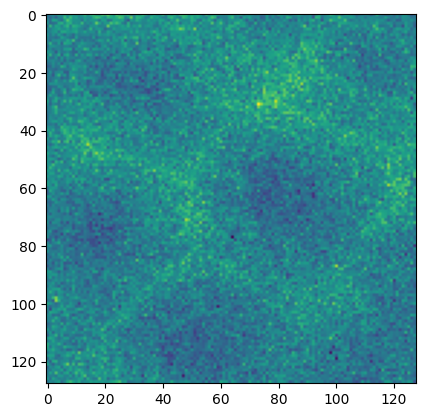

In [4]:
# Create a figure and display the first Z-plane (index 0)
fig, ax = plt.subplots()

# intensities[0] gets the first plane of the Z-stack
_ = ax.imshow(image.intensities[0])